In [1]:
import os
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
def get_files(source):
    filenames = sorted([os.path.join(source, filename) for filename in os.listdir(source)])
    return filenames


cnn = get_files(source="news_processed/proccessed cnn")
nyt = get_files(source="news_processed/proccessed nyt")
fox = get_files(source="news_processed/processed fox")
allnews = get_files(source="news_processed/all news/")

In [3]:
import matplotlib
from matplotlib import pyplot as plt
import sklearn.feature_extraction.text as text
import os
import gensim
import smart_open
import pprint as pp
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
from collections import defaultdict
from gensim import corpora
from gensim import models
import pprint as pprint
from nltk.corpus import stopwords
from matplotlib import pyplot as plt




def read_corpus(fname, tokens_only=False):

    with smart_open.open(fname, encoding='iso-8859-1') as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])


def return_test_corpus(doc):
    test_corpus_ = []
    doc_test = doc[56:]
    for files in doc_test:
        test_corpus = list(read_corpus(files, tokens_only=True))
        test_corpus_.append(test_corpus)
    flat_list = [item for sublist in test_corpus_ for item in sublist]
    return flat_list


def return_train_corpus(doc):
    
    train_corpus_ = []
    for file in doc:
        tr_corpus = list(read_corpus(file))
        train_corpus_.append(tr_corpus)
    flat_list = [item for sublist in train_corpus_ for item in sublist]
    return flat_list


fox_train = return_train_corpus(doc=allnews)
# fox_test = return_test_corpus(doc=allnews)


model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=13)
vocab = model.build_vocab(fox_train)

model.train(fox_train, total_examples=model.corpus_count, epochs=model.epochs)


2020-05-07 14:58:06,093 : INFO : 'pattern' package not found; tag filters are not available for English
2020-05-07 14:58:09,266 : INFO : collecting all words and their counts
2020-05-07 14:58:09,268 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-05-07 14:58:09,322 : INFO : PROGRESS: at example #10000, processed 89610 words (1684864/s), 7858 word types, 1685 tags
2020-05-07 14:58:09,393 : INFO : PROGRESS: at example #20000, processed 187207 words (1406809/s), 11677 word types, 2381 tags
2020-05-07 14:58:09,471 : INFO : PROGRESS: at example #30000, processed 303457 words (1498880/s), 15243 word types, 2381 tags
2020-05-07 14:58:09,528 : INFO : collected 17102 word types and 2381 unique tags from a corpus of 37609 examples and 385357 words
2020-05-07 14:58:09,529 : INFO : Loading a fresh vocabulary
2020-05-07 14:58:09,675 : INFO : effective_min_count=2 retains 9677 unique words (56% of original 17102, drops 7425)
2020-05-07 14:58:09,676 : INFO : effec

2020-05-07 14:58:52,333 : INFO : EPOCH - 8 : training on 385357 raw words (327819 effective words) took 4.1s, 79905 effective words/s
2020-05-07 14:58:53,574 : INFO : EPOCH 9 - PROGRESS: at 18.07% examples, 48133 words/s, in_qsize 5, out_qsize 0
2020-05-07 14:58:54,792 : INFO : EPOCH 9 - PROGRESS: at 48.93% examples, 59880 words/s, in_qsize 5, out_qsize 0
2020-05-07 14:58:55,901 : INFO : EPOCH 9 - PROGRESS: at 78.20% examples, 69735 words/s, in_qsize 5, out_qsize 0
2020-05-07 14:58:56,754 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-07 14:58:56,831 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-07 14:58:56,869 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-07 14:58:56,870 : INFO : EPOCH - 9 : training on 385357 raw words (327705 effective words) took 4.5s, 72460 effective words/s
2020-05-07 14:58:58,066 : INFO : EPOCH 10 - PROGRESS: at 18.07% examples, 49849 words/s, in_qsize 5, out_qsize 0
2020-05-07

In [4]:
print(model.wv.doesnt_match("dumb ignorant intelligent".split()))
print(model.wv.doesnt_match("cure disease vaccine".split()))
print(model.wv.doesnt_match("cough diarrhea fever".split()))
print(model.wv.doesnt_match("cat bat dog".split()))
print(model.wv.similar_by_vector('cnn', topn=10, restrict_vocab=None))
print(model.wv.similar_by_vector('china', topn=10, restrict_vocab=None))
print(model.wv.similar_by_vector('disinfectant', topn=10, restrict_vocab=None))
print(model.wv.similar_by_vector('hate', topn=10, restrict_vocab=None))
print(model.wv.similar_by_vector('gullible', topn=10, restrict_vocab=None))


2020-05-07 14:59:14,907 : INFO : precomputing L2-norms of word weight vectors


intelligent
disease
diarrhea
bat
[('media', 0.8131926655769348), ('fox', 0.7899363040924072), ('story', 0.7787185907363892), ('msnbc', 0.7567592859268188), ('fake', 0.7504075765609741), ('network', 0.7482936382293701), ('news', 0.7482407689094543), ('reporting', 0.7425278425216675), ('gatica', 0.7410403490066528), ('false', 0.7261260747909546)]
[('chinese', 0.7646571397781372), ('wuhan', 0.6824358105659485), ('ban', 0.659805178642273), ('lab', 0.6484494805335999), ('travel', 0.6376866102218628), ('ccp', 0.6066277623176575), ('laboratory', 0.5967181921005249), ('investigated', 0.5913117527961731), ('created', 0.5837051868438721), ('market', 0.5807388424873352)]
[('injecting', 0.9459576606750488), ('bleach', 0.9229283928871155), ('lysol', 0.9117627739906311), ('disinfectants', 0.9044933319091797), ('inject', 0.8432615995407104), ('clorox', 0.8409777879714966), ('ingest', 0.8146525025367737), ('drinking', 0.8079239130020142), ('ingesting', 0.792052149772644), ('drink', 0.7888910174369812)

C:\Users\andreea.moldovan\Miniconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [5]:
f_for_cluster = open('result.txt','r',encoding='utf-8')
f_for_cluster = f_for_cluster.readlines()



# stop_words = stopwords.words('english')
# stop_words.extend(['from','more','someone','him','…','$','&', 'subject', "بو*", 'r', 'u','probably', 'ca','their',
#                    're','she','"','&','her', 'edu', 'use', 'not', 'would', 'say', 'could', '_','cat','r', 'd.', '/',
#                     'be' , 'know', 'good', 'go', 'get', 'do', 'done',"n't",'us','even','him','if', 
#                    'try', 'many' 'some', 'nice','&','guys','needs',',','said','happy','can','but'
#                    'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want',
#                    'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may','probably','more' 'take', 'come',
#                    '#','...','"','thank','if','should','get','would',"\'s",'yes','things','really'"'s",'many','’s','?','back',
#                    '!','really','one',"n’t","youtoube.com","ever",
#                     ])

# stoplist = []
# texts = [
#     [word for word in document.lower().split() if word not in stop_words]
#     for document in f_for_cluster
# ] 


# frequency = defaultdict(int)
# for text in texts:
#     for token in text:
#         frequency[token] += 1
        
# texts = [
#     [token for token in text if frequency[token] > 1]
#     for text in texts
# ]

# dictionary = corpora.Dictionary(texts)
# corpus = [dictionary.doc2bow(text) for text in texts]



In [15]:
# Build the bigram and trigram models
import spacy
import en_core_web_sm
from gensim.utils import lemmatize, simple_preprocess

nlp = en_core_web_sm.load()

stop_words = stopwords.words('english')
stop_words.extend(['from','more','someone','him','…','$','&', 'subject', "بو*", 'r', 'u','probably', 'ca','their',
                   're','she','"','&','her', 'edu', 'use', 'not', 'would', 'say', 'could', '_','cat','r', 'd.', '/',
                    'be' , 'know', 'good', 'go', 'get', 'do', 'done', 'thank','family','world','medium','governor','work','believe','day',
                   'try', 'many' 'some', 'nice','&','guys','needs','happy','people','thank','open','live','first','start'
                   'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want','back','tell','believe'
                   'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may','probably','more' 'take', 'come',
                   '#','...','"',"\'",'mr','pearl','every','forever','let','course','hand','beautiful','ever','take','must'])


bigram = gensim.models.Phrases(f_for_cluster, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[f_for_cluster], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)



def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
     
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(f_for_cluster)  # processed Text Data!

2020-05-07 17:00:53,254 : INFO : collecting all words and their counts
2020-05-07 17:00:53,256 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-05-07 17:00:54,950 : INFO : PROGRESS: at sentence #10000, processed 547387 words and 2508 word types
2020-05-07 17:00:56,559 : INFO : PROGRESS: at sentence #20000, processed 1164919 words and 3725 word types
2020-05-07 17:00:58,563 : INFO : PROGRESS: at sentence #30000, processed 1910304 words and 4712 word types
2020-05-07 17:00:59,929 : INFO : collected 5116 word types from a corpus of 2369372 words (unigram + bigrams) and 37598 sentences
2020-05-07 17:00:59,931 : INFO : using 5116 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2020-05-07 17:01:00,145 : INFO : collecting all words and their counts
2020-05-07 17:01:00,147 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-05-07 17:01:01,929 : INFO : PROGRESS: at sentence #10000, processed 547387 words a

In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpuss = [id2word.doc2bow(text) for text in data_ready]
corpuss
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpuss,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=200,
                                           update_every=1,
                                           chunksize=900,
                                           passes=1,
                                           alpha='auto',
                                           iterations=100,
                                           per_word_topics=True)

pp.pprint(lda_model.print_topics())

2020-05-07 17:10:32,330 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-07 17:10:32,489 : INFO : adding document #10000 to Dictionary(4346 unique tokens: ['best', 'effect', 'hope', 'increase', 'large']...)
2020-05-07 17:10:32,723 : INFO : adding document #20000 to Dictionary(6701 unique tokens: ['best', 'effect', 'hope', 'increase', 'large']...)
2020-05-07 17:10:32,978 : INFO : adding document #30000 to Dictionary(8681 unique tokens: ['best', 'effect', 'hope', 'increase', 'large']...)
2020-05-07 17:10:33,159 : INFO : built Dictionary(9547 unique tokens: ['best', 'effect', 'hope', 'increase', 'large']...) from 37598 documents (total 124920 corpus positions)
2020-05-07 17:10:33,541 : INFO : using autotuned alpha, starting with [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
2020-05-07 17:10:33,543 : INFO : using symmetric eta at 0.16666666666666666
2020-05-07 17:10:33,548 : INFO : using serial LDA version on this node
2020-05-07 17:10:33,56

2020-05-07 17:10:35,553 : INFO : topic #4 (0.168): 0.050*"government" + 0.019*"federal" + 0.016*"help" + 0.014*"state" + 0.014*"pay" + 0.013*"control" + 0.013*"responsible" + 0.012*"blame" + 0.011*"whole" + 0.010*"chinese"
2020-05-07 17:10:35,555 : INFO : topic diff=0.272060, rho=0.447214
2020-05-07 17:10:35,557 : INFO : PROGRESS: pass 0, at document #5400/37598
2020-05-07 17:10:35,809 : INFO : optimized alpha [0.15738305, 0.14370264, 0.14607924, 0.16129023, 0.169073, 0.14395289]
2020-05-07 17:10:35,817 : INFO : merging changes from 900 documents into a model of 37598 documents
2020-05-07 17:10:35,827 : INFO : topic #1 (0.144): 0.023*"story" + 0.018*"information" + 0.015*"call" + 0.014*"face" + 0.013*"folk" + 0.012*"research" + 0.011*"many" + 0.011*"support" + 0.010*"virus" + 0.010*"nation"
2020-05-07 17:10:35,829 : INFO : topic #5 (0.144): 0.025*"suppose" + 0.020*"cover" + 0.019*"buy" + 0.019*"bat" + 0.018*"release" + 0.017*"government" + 0.016*"country" + 0.015*"biological" + 0.014*"

2020-05-07 17:10:37,765 : INFO : topic #1 (0.165): 0.125*"death" + 0.063*"die" + 0.056*"cause" + 0.051*"heart" + 0.028*"number" + 0.023*"covid" + 0.022*"list" + 0.019*"attack" + 0.017*"disease" + 0.015*"count"
2020-05-07 17:10:37,768 : INFO : topic #4 (0.178): 0.021*"government" + 0.014*"reason" + 0.014*"criminal" + 0.014*"record" + 0.013*"stupid" + 0.012*"lie" + 0.011*"true" + 0.010*"help" + 0.010*"pay" + 0.009*"control"
2020-05-07 17:10:37,771 : INFO : topic #3 (0.185): 0.075*"death" + 0.073*"virus" + 0.042*"die" + 0.024*"kill" + 0.020*"year" + 0.018*"covid" + 0.016*"disease" + 0.015*"flu" + 0.013*"fear" + 0.013*"number"
2020-05-07 17:10:37,774 : INFO : topic diff=0.190874, rho=0.301511
2020-05-07 17:10:37,776 : INFO : PROGRESS: pass 0, at document #10800/37598
2020-05-07 17:10:38,181 : INFO : optimized alpha [0.16865645, 0.16926461, 0.16143166, 0.19149882, 0.18252572, 0.15268792]
2020-05-07 17:10:38,197 : INFO : merging changes from 900 documents into a model of 37598 documents
2020

2020-05-07 17:10:39,794 : INFO : topic #1 (0.175): 0.053*"death" + 0.031*"bless" + 0.028*"die" + 0.026*"parent" + 0.024*"cause" + 0.020*"heart" + 0.017*"child" + 0.015*"covid" + 0.015*"call" + 0.015*"number"
2020-05-07 17:10:39,797 : INFO : topic #0 (0.182): 0.020*"com" + 0.019*"love" + 0.017*"lie" + 0.016*"long" + 0.016*"time" + 0.015*"state" + 0.014*"vote" + 0.014*"news" + 0.013*"remember" + 0.011*"model"
2020-05-07 17:10:39,799 : INFO : topic #3 (0.203): 0.039*"virus" + 0.029*"death" + 0.016*"die" + 0.016*"year" + 0.014*"kill" + 0.013*"flu" + 0.011*"already" + 0.011*"still" + 0.011*"expert" + 0.010*"spread"
2020-05-07 17:10:39,801 : INFO : topic #4 (0.204): 0.018*"plan" + 0.015*"help" + 0.015*"school" + 0.012*"much" + 0.012*"government" + 0.011*"lady" + 0.009*"doctor" + 0.008*"keep" + 0.008*"president" + 0.008*"really"
2020-05-07 17:10:39,803 : INFO : topic diff=0.196468, rho=0.242536
2020-05-07 17:10:39,805 : INFO : PROGRESS: pass 0, at document #16200/37598
2020-05-07 17:10:40,065

2020-05-07 17:10:41,998 : INFO : optimized alpha [0.2081125, 0.18192905, 0.20819747, 0.22829346, 0.2460267, 0.16872634]
2020-05-07 17:10:42,004 : INFO : merging changes from 900 documents into a model of 37598 documents
2020-05-07 17:10:42,011 : INFO : topic #5 (0.169): 0.021*"mask" + 0.015*"leader" + 0.015*"public" + 0.013*"citizen" + 0.011*"country" + 0.011*"order" + 0.011*"problem" + 0.010*"maybe" + 0.010*"care" + 0.010*"write"
2020-05-07 17:10:42,012 : INFO : topic #1 (0.182): 0.027*"death" + 0.025*"call" + 0.022*"die" + 0.014*"cause" + 0.012*"wrong" + 0.012*"face" + 0.012*"border" + 0.012*"positive" + 0.011*"number" + 0.011*"many"
2020-05-07 17:10:42,014 : INFO : topic #2 (0.208): 0.025*"stay" + 0.025*"home" + 0.018*"great" + 0.017*"life" + 0.016*"country" + 0.015*"time" + 0.014*"woman" + 0.012*"social" + 0.012*"sure" + 0.012*"leader"
2020-05-07 17:10:42,015 : INFO : topic #3 (0.228): 0.045*"virus" + 0.018*"spread" + 0.016*"travel" + 0.015*"year" + 0.015*"still" + 0.014*"week" + 0

2020-05-07 17:10:43,640 : INFO : topic diff=0.174407, rho=0.188982
2020-05-07 17:10:43,642 : INFO : PROGRESS: pass 0, at document #26100/37598
2020-05-07 17:10:43,890 : INFO : optimized alpha [0.2325053, 0.19445302, 0.23664485, 0.25956818, 0.29482147, 0.18483664]
2020-05-07 17:10:43,898 : INFO : merging changes from 900 documents into a model of 37598 documents
2020-05-07 17:10:43,906 : INFO : topic #5 (0.185): 0.018*"money" + 0.015*"disaster" + 0.014*"problem" + 0.013*"leader" + 0.013*"health" + 0.013*"mask" + 0.012*"cover" + 0.012*"medical" + 0.012*"public" + 0.011*"fault"
2020-05-07 17:10:43,908 : INFO : topic #1 (0.194): 0.025*"call" + 0.024*"death" + 0.022*"die" + 0.019*"cause" + 0.016*"bless" + 0.014*"doctor" + 0.013*"wrong" + 0.011*"group" + 0.010*"stand" + 0.010*"follow"
2020-05-07 17:10:43,910 : INFO : topic #2 (0.237): 0.021*"great" + 0.018*"time" + 0.017*"life" + 0.016*"stay" + 0.016*"home" + 0.016*"man" + 0.012*"country" + 0.011*"person" + 0.011*"never" + 0.010*"listen"
202

2020-05-07 17:10:45,822 : INFO : topic #3 (0.278): 0.031*"virus" + 0.018*"year" + 0.015*"expert" + 0.015*"kill" + 0.013*"economy" + 0.012*"week" + 0.011*"already" + 0.011*"last" + 0.011*"death" + 0.011*"new"
2020-05-07 17:10:45,825 : INFO : topic #4 (0.360): 0.031*"disinfectant" + 0.030*"stupid" + 0.024*"inject" + 0.016*"sense" + 0.015*"president" + 0.013*"really" + 0.013*"common" + 0.013*"control" + 0.012*"question" + 0.012*"help"
2020-05-07 17:10:45,827 : INFO : topic diff=0.156645, rho=0.171499
2020-05-07 17:10:45,828 : INFO : PROGRESS: pass 0, at document #31500/37598
2020-05-07 17:10:46,050 : INFO : optimized alpha [0.25889906, 0.21311724, 0.2754156, 0.28044617, 0.3670805, 0.20036848]
2020-05-07 17:10:46,059 : INFO : merging changes from 900 documents into a model of 37598 documents
2020-05-07 17:10:46,069 : INFO : topic #5 (0.200): 0.020*"medical" + 0.020*"decision" + 0.017*"mask" + 0.015*"allow" + 0.015*"dumb" + 0.014*"public" + 0.013*"problem" + 0.013*"health" + 0.013*"brain" +

2020-05-07 17:10:48,051 : INFO : topic #1 (0.222): 0.051*"call" + 0.020*"conspiracy" + 0.016*"die" + 0.015*"cause" + 0.014*"theory" + 0.013*"wrong" + 0.013*"story" + 0.012*"shot" + 0.012*"follow" + 0.012*"test"
2020-05-07 17:10:48,053 : INFO : topic #2 (0.298): 0.023*"life" + 0.018*"great" + 0.018*"stay" + 0.017*"time" + 0.015*"home" + 0.015*"listen" + 0.014*"sure" + 0.014*"never" + 0.012*"man" + 0.011*"hold"
2020-05-07 17:10:48,056 : INFO : topic #3 (0.310): 0.051*"virus" + 0.027*"year" + 0.023*"economy" + 0.016*"already" + 0.014*"vaccine" + 0.013*"case" + 0.013*"death" + 0.012*"send" + 0.012*"expert" + 0.012*"kill"
2020-05-07 17:10:48,059 : INFO : topic #4 (0.407): 0.019*"blame" + 0.017*"help" + 0.013*"stupid" + 0.013*"state" + 0.013*"thing" + 0.013*"president" + 0.013*"disinfectant" + 0.012*"really" + 0.012*"trump" + 0.011*"happen"
2020-05-07 17:10:48,061 : INFO : topic diff=0.153826, rho=0.158114
2020-05-07 17:10:48,063 : INFO : PROGRESS: pass 0, at document #36900/37598
2020-05-07

[(0,
  '0.026*"news" + 0.020*"power" + 0.018*"lie" + 0.017*"state" + 0.017*"vote" + '
  '0.016*"election" + 0.016*"watch" + 0.015*"fake" + 0.013*"always" + '
  '0.013*"time"'),
 (1,
  '0.044*"call" + 0.019*"die" + 0.016*"cause" + 0.015*"conspiracy" + '
  '0.014*"normal" + 0.011*"wrong" + 0.011*"theory" + 0.011*"story" + '
  '0.010*"test" + 0.010*"least"'),
 (2,
  '0.023*"life" + 0.017*"stay" + 0.016*"time" + 0.016*"great" + 0.014*"home" + '
  '0.014*"sure" + 0.014*"never" + 0.012*"listen" + 0.011*"man" + '
  '0.010*"country"'),
 (3,
  '0.052*"virus" + 0.026*"year" + 0.018*"economy" + 0.013*"vaccine" + '
  '0.013*"already" + 0.013*"case" + 0.013*"death" + 0.012*"still" + '
  '0.012*"flu" + 0.012*"last"'),
 (4,
  '0.017*"blame" + 0.016*"help" + 0.013*"thing" + 0.012*"president" + '
  '0.012*"state" + 0.012*"care" + 0.011*"really" + 0.011*"stupid" + '
  '0.011*"government" + 0.010*"happen"'),
 (5,
  '0.018*"medical" + 0.018*"decision" + 0.017*"health" + 0.017*"mask" + '
  '0.014*"state" +

In [17]:
tfidf = models.TfidfModel(corpuss)
corpus_tfidf = tfidf[corpuss]
lsi_model = models.LsiModel(corpus_tfidf,chunksize=900, id2word=id2word,power_iters=5, num_topics=6)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lsi_model.print_topics(10)

2020-05-07 17:10:49,113 : INFO : collecting document frequencies
2020-05-07 17:10:49,115 : INFO : PROGRESS: processing document #0
2020-05-07 17:10:49,139 : INFO : PROGRESS: processing document #10000
2020-05-07 17:10:49,158 : INFO : PROGRESS: processing document #20000
2020-05-07 17:10:49,182 : INFO : PROGRESS: processing document #30000
2020-05-07 17:10:49,197 : INFO : calculating IDF weights for 37598 documents and 9547 features (119656 matrix non-zeros)
2020-05-07 17:10:49,261 : INFO : using serial LSI version on this node
2020-05-07 17:10:49,263 : INFO : updating model with new documents
2020-05-07 17:10:49,329 : INFO : preparing a new chunk of documents
2020-05-07 17:10:49,338 : INFO : using 100 extra samples and 5 power iterations
2020-05-07 17:10:49,341 : INFO : 1st phase: constructing (9547, 106) action matrix
2020-05-07 17:10:49,354 : INFO : orthonormalizing (9547, 106) action matrix
2020-05-07 17:10:49,818 : INFO : 2nd phase: running dense svd on (106, 900) matrix
2020-05-07

2020-05-07 17:10:52,503 : INFO : computing the final decomposition
2020-05-07 17:10:52,505 : INFO : keeping 6 factors (discarding 84.862% of energy spectrum)
2020-05-07 17:10:52,510 : INFO : merging projections: (9547, 6) + (9547, 6)
2020-05-07 17:10:52,516 : INFO : keeping 6 factors (discarding 21.407% of energy spectrum)
2020-05-07 17:10:52,519 : INFO : processed documents up to #4500
2020-05-07 17:10:52,521 : INFO : topic #0(6.708): 0.592*"state" + 0.505*"government" + 0.423*"federal" + 0.174*"suppose" + 0.162*"local" + 0.149*"job" + 0.142*"responsibility" + 0.105*"responsible" + 0.080*"care" + 0.076*"chinese"
2020-05-07 17:10:52,524 : INFO : topic #1(4.104): 0.350*"virus" + 0.324*"recover" + 0.313*"many" + 0.308*"hide" + 0.272*"death" + 0.257*"die" + 0.193*"number" + 0.183*"create" + 0.168*"flu" + 0.165*"country"
2020-05-07 17:10:52,527 : INFO : topic #2(3.850): -0.864*"recover" + 0.244*"hide" + 0.204*"virus" + -0.195*"many" + 0.139*"create" + 0.082*"chinese" + 0.078*"accountable" 

2020-05-07 17:10:54,955 : INFO : topic #2(4.541): -0.493*"origin" + 0.402*"death" + 0.366*"die" + -0.251*"track" + 0.219*"many" + -0.178*"documentary" + -0.166*"movie" + 0.151*"number" + 0.139*"flu" + -0.131*"virus"
2020-05-07 17:10:54,958 : INFO : topic #3(3.946): 0.522*"chinese" + 0.397*"release" + -0.327*"origin" + -0.252*"recover" + 0.222*"create" + -0.209*"die" + 0.179*"virus" + -0.177*"track" + -0.158*"death" + -0.151*"many"
2020-05-07 17:10:54,961 : INFO : topic #4(3.853): -0.895*"recover" + -0.202*"many" + -0.190*"release" + 0.145*"death" + 0.132*"hide" + 0.123*"die" + -0.111*"chinese" + -0.059*"crime" + -0.048*"criminal" + 0.047*"covid"
2020-05-07 17:10:55,015 : INFO : preparing a new chunk of documents
2020-05-07 17:10:55,023 : INFO : using 100 extra samples and 5 power iterations
2020-05-07 17:10:55,025 : INFO : 1st phase: constructing (9547, 106) action matrix
2020-05-07 17:10:55,038 : INFO : orthonormalizing (9547, 106) action matrix
2020-05-07 17:10:55,514 : INFO : 2nd ph

2020-05-07 17:10:57,460 : INFO : preparing a new chunk of documents
2020-05-07 17:10:57,466 : INFO : using 100 extra samples and 5 power iterations
2020-05-07 17:10:57,466 : INFO : 1st phase: constructing (9547, 106) action matrix
2020-05-07 17:10:57,477 : INFO : orthonormalizing (9547, 106) action matrix
2020-05-07 17:10:57,928 : INFO : 2nd phase: running dense svd on (106, 900) matrix
2020-05-07 17:10:57,985 : INFO : computing the final decomposition
2020-05-07 17:10:57,988 : INFO : keeping 6 factors (discarding 83.007% of energy spectrum)
2020-05-07 17:10:57,993 : INFO : merging projections: (9547, 6) + (9547, 6)
2020-05-07 17:10:58,003 : INFO : keeping 6 factors (discarding 15.350% of energy spectrum)
2020-05-07 17:10:58,007 : INFO : processed documents up to #12600
2020-05-07 17:10:58,009 : INFO : topic #0(8.825): 0.679*"death" + 0.373*"die" + 0.234*"virus" + 0.191*"cause" + 0.186*"heart" + 0.164*"number" + 0.152*"cancer" + 0.134*"covid" + 0.118*"disease" + 0.114*"many"
2020-05-07

2020-05-07 17:11:00,439 : INFO : processed documents up to #16200
2020-05-07 17:11:00,443 : INFO : topic #0(8.853): 0.673*"death" + 0.372*"die" + 0.235*"virus" + 0.190*"cause" + 0.184*"heart" + 0.164*"number" + 0.151*"cancer" + 0.133*"covid" + 0.117*"disease" + 0.115*"many"
2020-05-07 17:11:00,446 : INFO : topic #1(6.853): 0.573*"state" + 0.495*"government" + 0.396*"federal" + -0.173*"death" + 0.163*"suppose" + 0.151*"local" + 0.145*"chinese" + 0.142*"job" + 0.131*"responsibility" + 0.099*"responsible"
2020-05-07 17:11:00,448 : INFO : topic #2(5.580): 0.975*"bless" + 0.085*"virus" + 0.063*"lady" + 0.061*"origin" + -0.055*"death" + -0.052*"state" + 0.039*"country" + 0.038*"prayer" + -0.036*"federal" + 0.034*"love"
2020-05-07 17:11:00,451 : INFO : topic #3(5.343): 0.586*"virus" + 0.494*"origin" + -0.283*"death" + 0.242*"track" + 0.186*"chinese" + 0.169*"documentary" + 0.158*"create" + 0.157*"movie" + -0.156*"bless" + 0.143*"release"
2020-05-07 17:11:00,454 : INFO : topic #4(4.199): 0.452

2020-05-07 17:11:02,945 : INFO : topic #3(5.563): -0.931*"bless" + 0.231*"virus" + 0.152*"origin" + -0.094*"death" + 0.074*"track" + 0.067*"chinese" + -0.057*"lady" + 0.053*"create" + 0.052*"documentary" + 0.048*"movie"
2020-05-07 17:11:02,947 : INFO : topic #4(4.361): -0.510*"origin" + 0.346*"release" + -0.258*"track" + 0.217*"plan" + 0.208*"chinese" + 0.203*"recover" + -0.181*"documentary" + 0.174*"leader" + -0.169*"movie" + -0.150*"state"
2020-05-07 17:11:02,991 : INFO : preparing a new chunk of documents
2020-05-07 17:11:02,997 : INFO : using 100 extra samples and 5 power iterations
2020-05-07 17:11:02,999 : INFO : 1st phase: constructing (9547, 106) action matrix
2020-05-07 17:11:03,008 : INFO : orthonormalizing (9547, 106) action matrix
2020-05-07 17:11:03,487 : INFO : 2nd phase: running dense svd on (106, 900) matrix
2020-05-07 17:11:03,530 : INFO : computing the final decomposition
2020-05-07 17:11:03,532 : INFO : keeping 6 factors (discarding 87.627% of energy spectrum)
2020-0

2020-05-07 17:11:05,580 : INFO : orthonormalizing (9547, 106) action matrix
2020-05-07 17:11:06,157 : INFO : 2nd phase: running dense svd on (106, 900) matrix
2020-05-07 17:11:06,211 : INFO : computing the final decomposition
2020-05-07 17:11:06,214 : INFO : keeping 6 factors (discarding 81.056% of energy spectrum)
2020-05-07 17:11:06,218 : INFO : merging projections: (9547, 6) + (9547, 6)
2020-05-07 17:11:06,225 : INFO : keeping 6 factors (discarding 19.448% of energy spectrum)
2020-05-07 17:11:06,228 : INFO : processed documents up to #24300
2020-05-07 17:11:06,231 : INFO : topic #0(9.170): 0.633*"death" + 0.347*"die" + 0.279*"virus" + 0.178*"cause" + 0.168*"heart" + 0.156*"number" + 0.138*"cancer" + 0.127*"covid" + 0.122*"many" + 0.109*"disease"
2020-05-07 17:11:06,235 : INFO : topic #1(6.976): 0.527*"state" + 0.462*"government" + 0.363*"federal" + -0.267*"death" + 0.156*"chinese" + 0.153*"suppose" + 0.148*"job" + 0.139*"local" + 0.120*"responsibility" + -0.105*"die"
2020-05-07 17:1

2020-05-07 17:11:09,081 : INFO : topic #1(7.041): 0.506*"state" + 0.443*"government" + 0.346*"federal" + -0.303*"death" + 0.157*"job" + 0.153*"chinese" + 0.147*"suppose" + 0.132*"local" + 0.128*"responsibility" + -0.121*"die"
2020-05-07 17:11:09,084 : INFO : topic #2(6.347): -0.972*"bless" + 0.110*"state" + 0.085*"government" + 0.075*"federal" + -0.047*"lady" + -0.041*"country" + -0.038*"president" + -0.037*"love" + -0.035*"prayer" + 0.032*"death"
2020-05-07 17:11:09,087 : INFO : topic #3(5.913): 0.618*"virus" + -0.337*"death" + 0.324*"origin" + -0.249*"state" + -0.175*"federal" + 0.158*"track" + 0.153*"chinese" + 0.145*"release" + -0.143*"government" + 0.137*"create"
2020-05-07 17:11:09,089 : INFO : topic #4(4.742): -0.467*"origin" + 0.274*"release" + -0.233*"track" + -0.224*"virus" + 0.192*"recover" + 0.177*"plan" + -0.168*"state" + -0.163*"documentary" + 0.161*"money" + -0.152*"movie"
2020-05-07 17:11:09,158 : INFO : preparing a new chunk of documents
2020-05-07 17:11:09,171 : INFO 

2020-05-07 17:11:12,319 : INFO : topic #4(5.455): 0.516*"virus" + 0.447*"origin" + -0.236*"disinfectant" + 0.219*"track" + -0.207*"inject" + -0.205*"stupid" + 0.154*"documentary" + -0.151*"news" + 0.143*"movie" + -0.132*"call"
2020-05-07 17:11:12,377 : INFO : preparing a new chunk of documents
2020-05-07 17:11:12,388 : INFO : using 100 extra samples and 5 power iterations
2020-05-07 17:11:12,390 : INFO : 1st phase: constructing (9547, 106) action matrix
2020-05-07 17:11:12,404 : INFO : orthonormalizing (9547, 106) action matrix
2020-05-07 17:11:12,991 : INFO : 2nd phase: running dense svd on (106, 900) matrix
2020-05-07 17:11:13,042 : INFO : computing the final decomposition
2020-05-07 17:11:13,044 : INFO : keeping 6 factors (discarding 81.310% of energy spectrum)
2020-05-07 17:11:13,051 : INFO : merging projections: (9547, 6) + (9547, 6)
2020-05-07 17:11:13,056 : INFO : keeping 6 factors (discarding 10.267% of energy spectrum)
2020-05-07 17:11:13,059 : INFO : processed documents up to

2020-05-07 17:11:15,672 : INFO : computing the final decomposition
2020-05-07 17:11:15,674 : INFO : keeping 6 factors (discarding 81.279% of energy spectrum)
2020-05-07 17:11:15,679 : INFO : merging projections: (9547, 6) + (9547, 6)
2020-05-07 17:11:15,685 : INFO : keeping 6 factors (discarding 12.733% of energy spectrum)
2020-05-07 17:11:15,687 : INFO : processed documents up to #36000
2020-05-07 17:11:15,690 : INFO : topic #0(10.033): 0.469*"death" + 0.337*"virus" + 0.276*"die" + 0.219*"state" + 0.141*"cause" + 0.136*"government" + 0.128*"number" + 0.126*"country" + 0.123*"many" + 0.121*"heart"
2020-05-07 17:11:15,692 : INFO : topic #1(7.810): 0.538*"state" + -0.441*"death" + 0.335*"government" + 0.271*"federal" + -0.212*"die" + -0.121*"heart" + -0.115*"cause" + 0.111*"responsibility" + 0.111*"chinese" + 0.110*"job"
2020-05-07 17:11:15,695 : INFO : topic #2(6.731): 0.574*"virus" + -0.381*"death" + 0.362*"origin" + -0.297*"state" + 0.161*"track" + -0.149*"federal" + 0.143*"chinese" +

[(0,
  '0.459*"death" + 0.356*"virus" + 0.271*"die" + 0.214*"state" + 0.138*"cause" + 0.136*"government" + 0.126*"country" + 0.125*"number" + 0.122*"many" + 0.119*"heart"'),
 (1,
  '0.537*"state" + -0.439*"death" + 0.342*"government" + 0.270*"federal" + -0.211*"die" + -0.120*"heart" + -0.115*"cause" + 0.111*"responsibility" + 0.110*"chinese" + 0.110*"job"'),
 (2,
  '0.588*"virus" + -0.395*"death" + 0.363*"origin" + -0.283*"state" + 0.163*"track" + -0.142*"federal" + 0.140*"chinese" + -0.128*"government" + 0.121*"documentary" + 0.112*"movie"'),
 (3,
  '0.965*"bless" + -0.109*"virus" + -0.093*"origin" + -0.076*"state" + -0.051*"government" + 0.049*"president" + 0.048*"lady" + 0.045*"country" + -0.042*"track" + -0.039*"federal"'),
 (4,
  '-0.378*"origin" + -0.260*"state" + 0.255*"disinfectant" + -0.231*"virus" + 0.226*"inject" + 0.223*"stupid" + -0.190*"bless" + 0.175*"news" + -0.170*"track" + 0.168*"call"'),
 (5,
  '-0.653*"stable" + -0.463*"genius" + -0.217*"call" + -0.211*"origin" + -0

In [18]:
def format_topics_sentences(texts, ldamodel, corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(texts=data_ready, ldamodel=lda_model, corpus=corpuss, )

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


In [19]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8282,"news, power, lie, state, vote, election, watch, fake, always, time","[seem, contradict, whole, premise, article, check, datum]"
1,1.0,0.8708,"call, die, cause, conspiracy, normal, wrong, theory, story, test, least","[number, calculate, reclassify, relate, guideline, state, classify, death, relate, probable, cov..."
2,2.0,0.8566,"life, stay, time, great, home, sure, never, listen, man, country","[woman, leader, job, objectively, well, leader, bot, troll, loon]"
3,3.0,0.9015,"virus, year, economy, vaccine, already, case, death, still, flu, last","[death, toll, clock, thousand, start, hear, vaccine, test, toll, less, hundred, intent, accept, ..."
4,4.0,0.8854,"blame, help, thing, president, state, care, really, stupid, government, happen","[state, care, care, state, ask, help, become, overwhelmed, trump, wonderful, job]"
5,5.0,0.8229,"medical, decision, health, mask, state, problem, supply, public, city, read","[hell, health, boss, sound, credible, health, boss]"


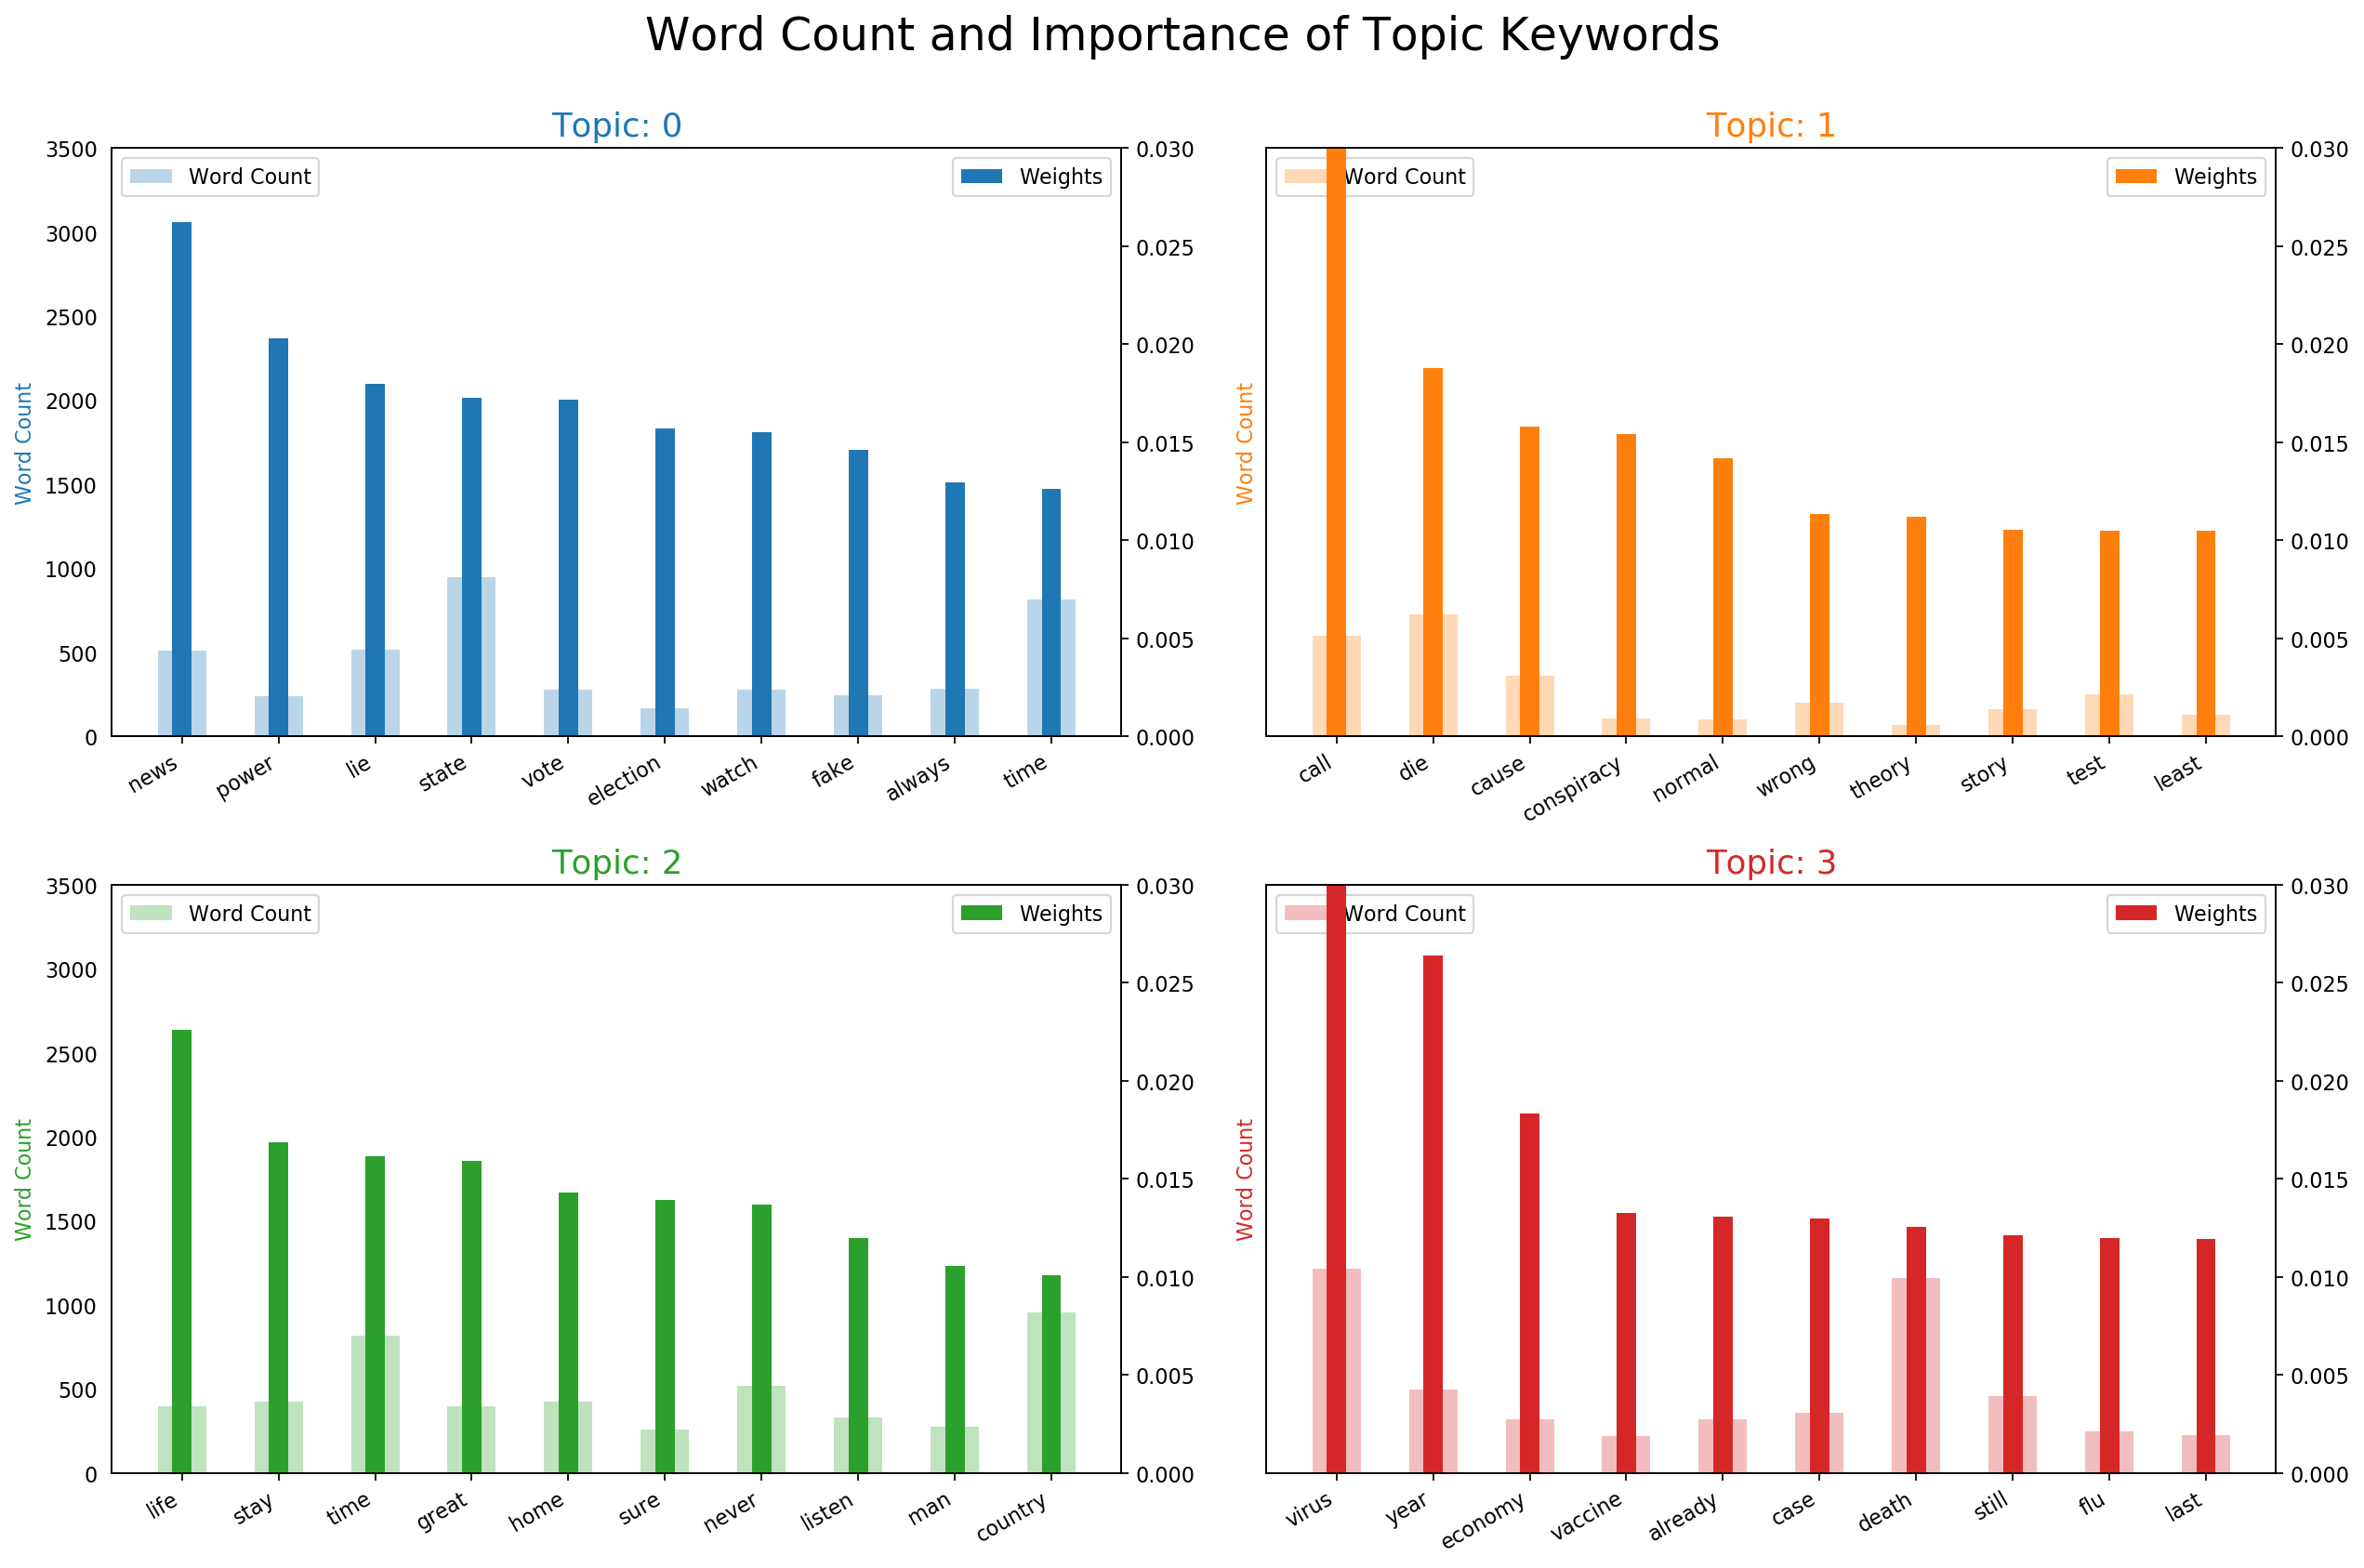

In [20]:
import matplotlib.colors as mcolors

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()
    

In [21]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpuss, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.206074 -0.089257       1        1  24.642485
3      0.198619 -0.150734       2        1  19.130440
2     -0.069842 -0.201419       3        1  17.079926
0     -0.075049  0.083007       4        1  14.785175
1      0.245268  0.109437       5        1  12.652002
5     -0.092922  0.248967       6        1  11.709974, topic_info=         Term         Freq        Total Category  logprob  loglift
99      virus  1249.000000  1249.000000  Default  30.0000  30.0000
153      call   717.000000   717.000000  Default  29.0000  29.0000
79       year   661.000000   661.000000  Default  28.0000  28.0000
124      news   488.000000   488.000000  Default  27.0000  27.0000
29       life   486.000000   486.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
342  business   118.783386   209.706360   Topic6  -4.8134   1.5763
10      state   207.317764   928.299377   Topic6  -4.2565   0.6456
316      care   160.530380   560.902039   Topic6  -4.5122   0.8937
724     leave   110.889145   251.413254   Topic6  -4.8822   1.3262
184   country   124.567230   906.583618   Topic6  -4.7659   0.1599

[333 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
134       1  0.827444        actually
134       3  0.109570        actually
134       5  0.060453        actually
838       2  0.986150  administration
684       2  0.996357             ago
...     ...       ...             ...
911       5  0.998386           wrong
79        1  0.003022            year
79        2  0.953318            year
79        3  0.042303            year
1235      3  0.994750             yet

[567 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2, 6])

In [ ]:
for doc, as_text in zip(corpus_lsi, f_for_cluster):
    print(doc, as_text)

In [ ]:
# We csn also generate an elbow plot to see what number of clusters is best using inertia
# This cell takes a while to run!
from sklearn.cluster import KMeans, DBSCAN
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_for_modeling)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'mx--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal Clusters using Inertia')
plt.show()